In [5]:
import numpy as np
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
%matplotlib inline

def get_data(filename):
    labels, data = [], []

    for line in open('./faces/train.txt'):
        im = misc.imread(line.strip().split()[0])
        data.append(im.reshape(2500,))
        labels.append(line.strip().split()[1])
    return (np.array(data, dtype=float), np.array(labels, dtype=int))

((540L, 2500L), (540L,))


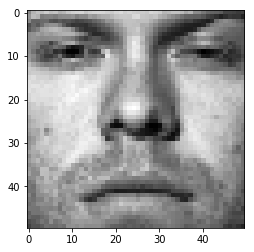

In [51]:
"""
Part 1.B
"""
train_data, train_labels = [], []
train_data, train_labels = get_data('./faces/train.txt')
    
print(train_data.shape, train_labels.shape)
plt.imshow(train_data[10, :].reshape(50,50), cmap=cm.Greys_r)

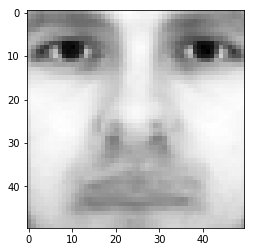

In [52]:
"""
Part 1.C
"""
training_avg = np.zeros(len(train_data[0]))
for td in train_data: training_avg += td
td /= len(train_data)

plt.clf()
plt.imshow(training_avg.reshape(50,50), cmap=cm.Greys_r)

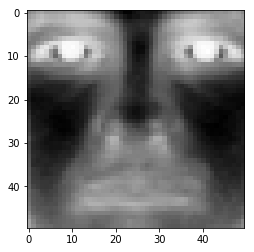

In [53]:
"""
Part 1.D - training set
"""
for i in range(len(train_data)): train_data[i] -= training_avg

plt.clf()
plt.imshow(train_data[10].reshape(50,50), cmap=cm.Greys_r)

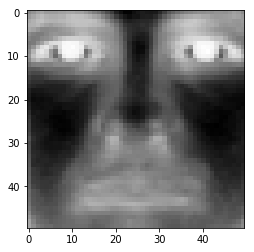

In [87]:
"""
Part 1.D - testing set
"""
test_data, test_labels = get_data('./faces/test.txt')
for i in range(len(test_data)): test_data[i] -= training_avg
  
plt.clf()
plt.imshow(test_data[0].reshape(50,50), cmap=cm.Greys_r)

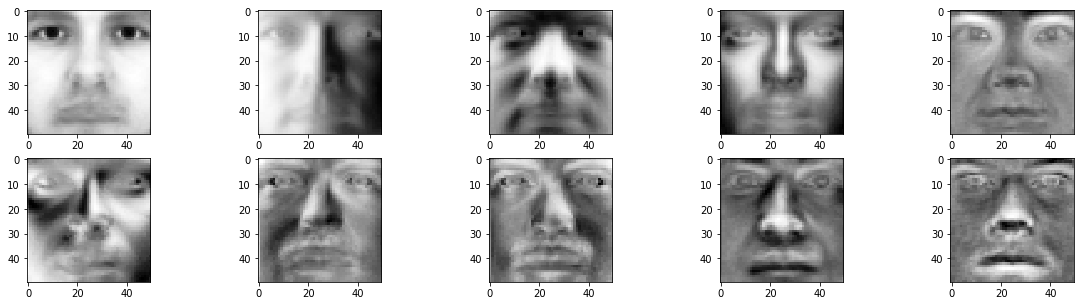

In [94]:
"""
Part 1.E
"""
from numpy.linalg import svd
U, E, Vt = svd(train_data, full_matrices=True)
U_test, E_test, Vt_test = svd(test_data, full_matrices=True)
E = np.diag(E)
E_test = np.diag(E_test)

plt.clf()
f, axarr = plt.subplots(2,5,figsize=(20,5))
for cols in range(5):
    for rows in range(2):
        axarr[rows, cols].imshow(Vt[rows*5 + cols].reshape(50,50), cmap=cm.Greys_r)


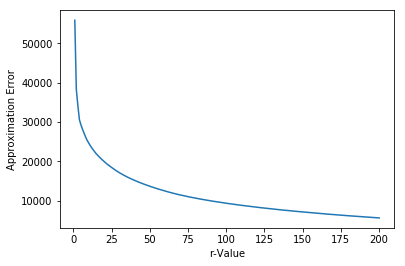

In [89]:
"""
Part 1.F
"""
x_axis = [i for i in range(1, 201)]
dist = []
for r in range(1,201):
    x_hat = U[:,:r].dot(E[:r,:r].dot(Vt[:r,:]))
    d = np.linalg.norm(train_data - x_hat, ord='fro')
    dist.append(d)

plt.clf()
plt.xlabel('r-Value')
plt.ylabel('Approximation Error')
plt.plot(x_axis, dist)

In [ ]:
"""
Part 1.G
"""
def get_F(r, data, V_t):
    return data.dot(np.transpose(V_t[:r,:]))

F_train = get_F(10, train_data, Vt)
F_test = get_F(10, test_data, Vt_test)

Score with r=10: 0.992592592593


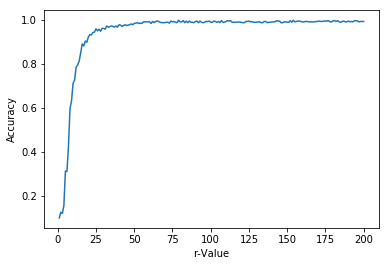

In [103]:
"""
Part 1.F
"""
def get_accuracy(model, test_data, test_labels):
    correct = 0.0
    predictions = model.predict(test_data)
    for i in range(len(predictions)):
        correct += 1.0 if predictions[i] == test_labels[i] else 0.0
    return correct / len(test_data)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='ovr')
model.fit(F_train, train_labels)
score = get_accuracy(model, F_test, test_labels)
print('Score with r=10: {0}'.format(score))

scores = []
for r in range(1, 201):
    F_train = get_F(r, train_data, Vt)
    F_test = get_F(r, test_data, Vt_test)
    
    model = LogisticRegression(multi_class='ovr')
    model.fit(F_train, train_labels)
    scores.append(get_accuracy(model, F_test, test_labels))

plt.clf()
plt.xlabel('r-Value')
plt.ylabel('Accuracy')
plt.plot(x_axis, scores)